# Data science and Business Analytics Internship 

# Lets Grow More Internship  Dec 22

## Task 2 (1) Exploratory Data Analysis on Dataset - Terrorism

In [1]:
# Importing the libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the dataset
df=pd.read_csv(r"C:\Users\user\Desktop\globalterrorismdb_0718dist.csv",encoding = 'ISO-8859-1')
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


# Exploring Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
df.shape

(181691, 135)

In [5]:
df.columns 

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

# Cleaning the data

In [6]:
#let's rename some important columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','nkill':'Killed',
                             'targsubtype1_txt':'Target_subtype','nwound':'Wounded','gname':'Group','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [7]:
df=df[['Year','Month','Day','Country','Region','State','City','latitude','longitude','Killed','Group','Wounded','Attack_type','Motive','Target_subtype','Weapon_type']]

In [8]:
df.head()

,Year,Month,Day,Country,Region,State,City,latitude,longitude,Killed,Group,Wounded,Attack_type,Motive,Target_subtype,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,MANO-D,0.0,Assassination,NaN,Named Civilian,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0.0,23rd of September Communist League,0.0,Hostage Taking (Kidnapping),NaN,"Diplomatic Personnel (outside of embassy, cons...",Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1.0,Unknown,0.0,Assassination,NaN,Radio Journalist/Staff/Facility,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,Unknown,NaN,Bombing/Explosion,NaN,Embassy/Consulate,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,Unknown,NaN,Facility/Infrastructure Attack,NaN,Embassy/Consulate,Incendiary


In [9]:
 # To find the row of column 
df.shape

(181691, 16)

In [10]:
#To find the information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   State           181270 non-null  object 
 6   City            181257 non-null  object 
 7   latitude        177135 non-null  float64
 8   longitude       177134 non-null  float64
 9   Killed          171378 non-null  float64
 10  Group           181691 non-null  object 
 11  Wounded         165380 non-null  float64
 12  Attack_type     181691 non-null  object 
 13  Motive          50561 non-null   object 
 14  Target_subtype  171318 non-null  object 
 15  Weapon_type     181691 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 22.2+ M

In [11]:
df.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
State                421
City                 434
latitude            4556
longitude           4557
Killed             10313
Group                  0
Wounded            16311
Attack_type            0
Motive            131130
Target_subtype     10373
Weapon_type            0
dtype: int64

In [12]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

In [13]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


# Obervation

#### The data consists of terrorist ranging of the year:1970 to 2017
#### Maximun number of people killes in an event were :1570
#### Maximun number of people Wouned in an event were: 8191
#### Maximun number of people casualties in a event were: 9574

# Correlation Analysis

<AxesSubplot:>

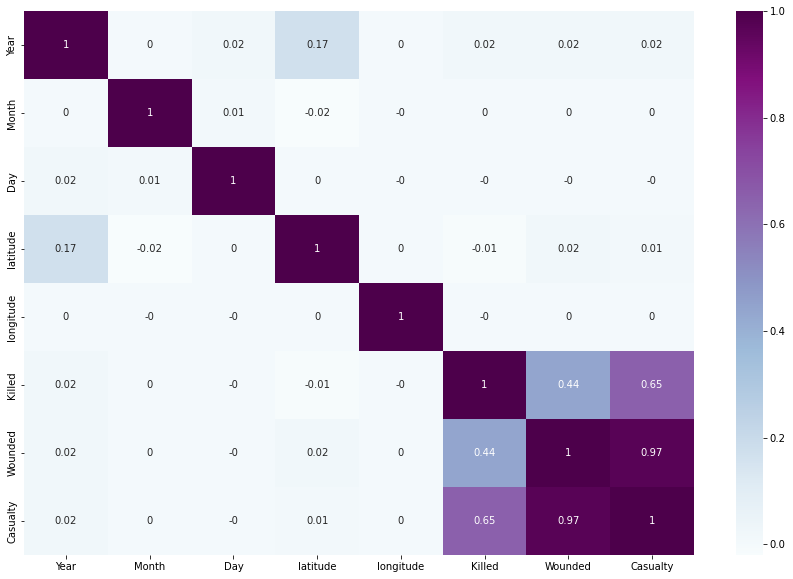

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(np.round(df.corr(),2),annot=True,cmap="BuPu")

# Visualization the data

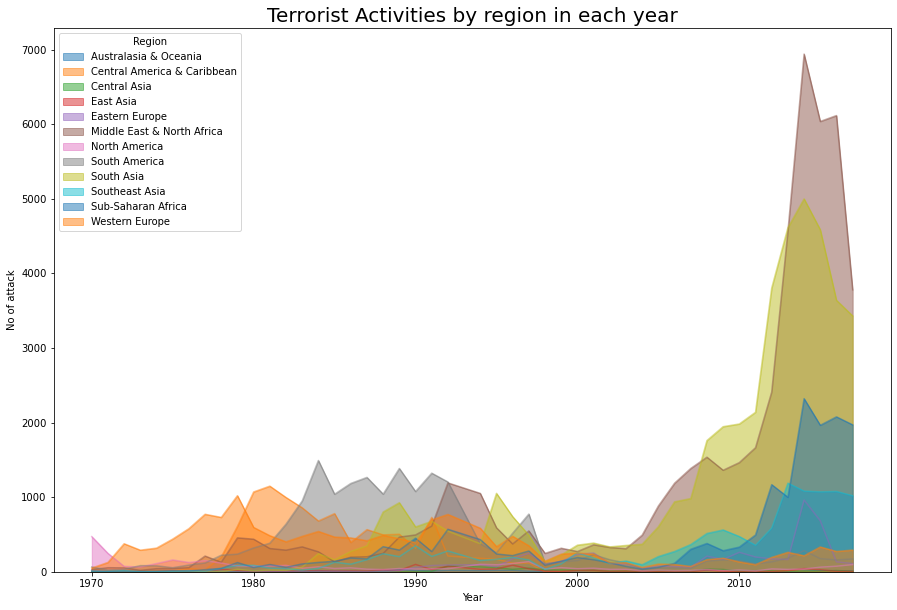

In [15]:
pd.crosstab(df.Year,df.Region).plot(kind="area",stacked=False,figsize=(15,10))
plt.title('Terrorist Activities by region in each year',fontsize=20)
plt.xlabel('Year')
plt.ylabel('No of attack')
plt.show()

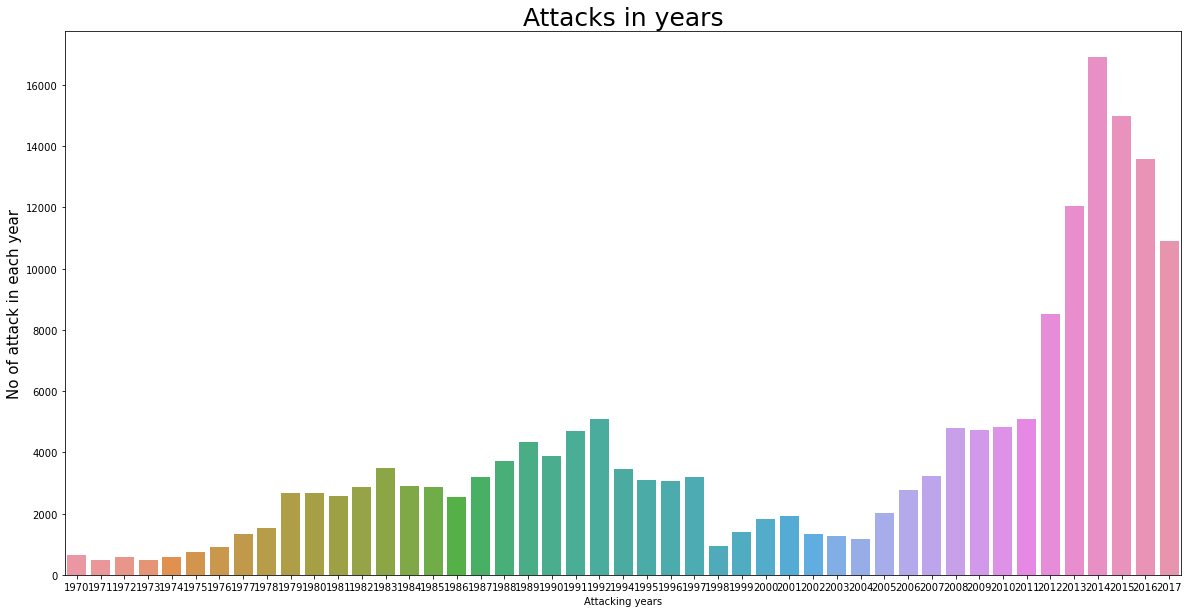

In [16]:
year=df['Year'].unique()
year_count=df['Year'].value_counts(dropna =False).sort_index()
plt.figure(figsize=(20,10))
sns.barplot(x=year,y=year_count)
plt.title('Attacks in years',fontsize = 25)
plt.xlabel('Attacking years',fontsize = 10)
plt.ylabel('No of attack in each year',fontsize=15)
plt.show()

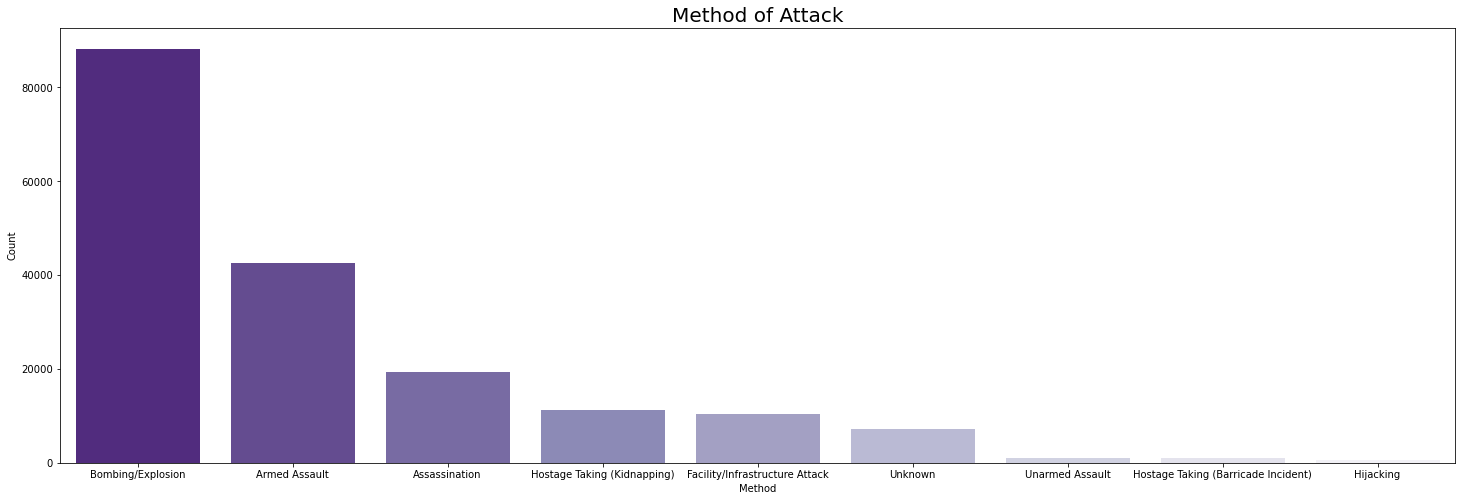

In [17]:
plt.subplots(figsize=(25,8))
sns.barplot(df['Attack_type'].value_counts()[:15].index,df['Attack_type'].value_counts()[:15].values,palette='Purples_r')
plt.title('Method of Attack',fontsize=20)
plt.xlabel('Method')
plt.ylabel('Count')
plt.show()

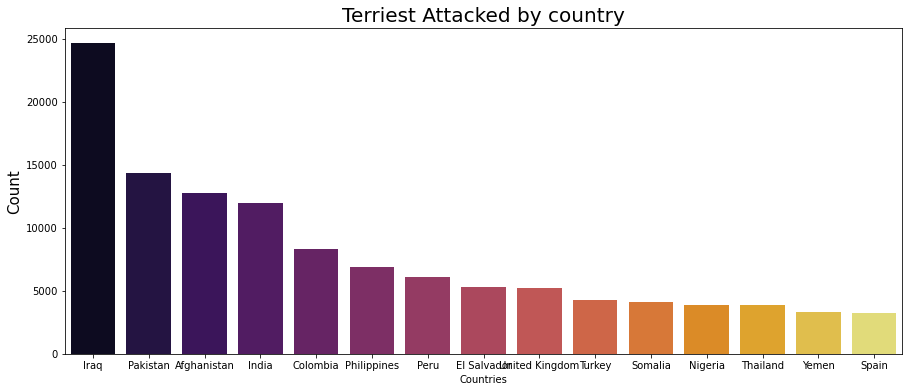

In [18]:
plt.subplots(figsize=(15,6))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values,palette='inferno')
plt.title('Terriest Attacked by country',fontsize = 20)
plt.xlabel('Countries',fontsize = 10)
plt.ylabel('Count',fontsize=15)
plt.show()

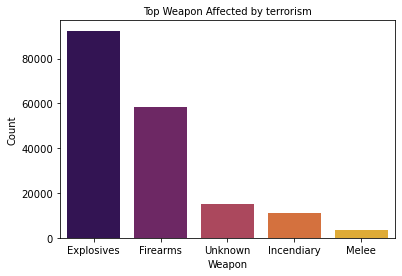

In [19]:
sns.barplot(df['Weapon_type'].value_counts()[:5].index,df['Weapon_type'].value_counts()[:5].values,palette='inferno')
plt.title('Top Weapon Affected by terrorism',fontsize = 10)
plt.xlabel('Weapon',fontsize =10)
plt.ylabel('Count',fontsize=10)
plt.show()

In [20]:
yc=df[["Year","Casualty"]].groupby("Year").sum()
yc.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


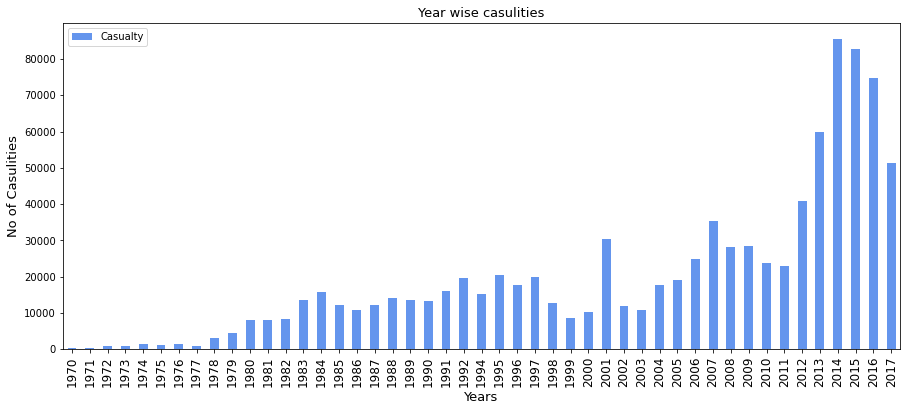

In [21]:
yc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Year wise casulities",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.ylabel("No of Casulities",fontsize=13)
plt.xticks(fontsize=12)
plt.show()

In [22]:
yk=df[["Year","Killed"]].groupby("Year").sum()
yk.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


In [23]:
yw=df[["Year","Wounded"]].groupby("Year").sum()
yw.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


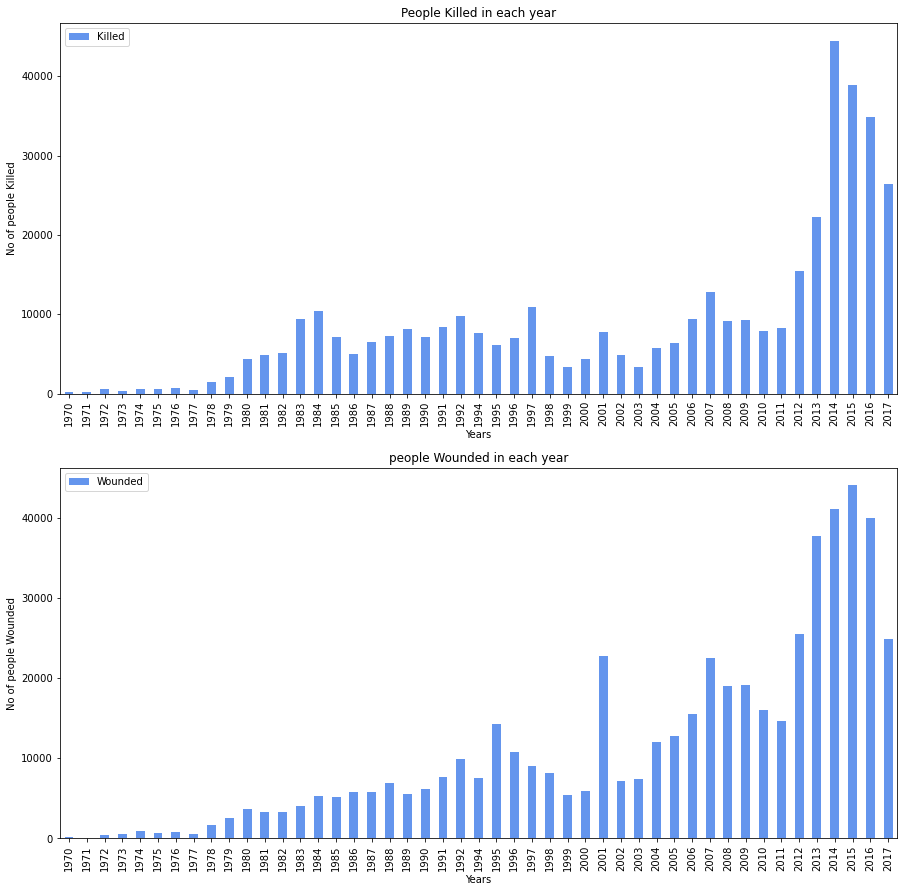

In [24]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)
#killed
yk.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each year")
ax0.set_xlabel("Years")
ax0.set_ylabel("No of people Killed")


#wounded
yw.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax1)
ax1.set_title("people Wounded in each year")
ax1.set_xlabel("Years")
ax1.set_ylabel("No of people Wounded")

plt.show()


# conclusion 

  #### Onwards year 2010, we can say that, Middle East and North Africa is more affected due to terrorism actives followed by South Asia. Around year 2000 least number of terrorism actives was active. We also see that, East Asia was least affected region due to terrorism actives over the year.
  #### Numbers of attacks incresed year 2011 onwards. We can see that from the above charts that, in the year 2014 maximum attack was taken place. 
  #### Bombing/Explosion is the major attacktype.
  #### Iraq is the most terrorism affected country due to terrorism and Spain is least affected country due to terrorism. We can say that Spain is the safest country and Iraq is one of dangerous country.
  #### Explosive is the major weapones used by trerriest to attack different countries.

#### The maximum number of people got killed in year 2014. Because of the terrorism, the more number of people got killed form the year 2011-2017 as compare to 1970-2010.

#### As we can see that, in the year of 2014 and 2015 more number people's got killed but in that corresponding year maximum number of people got wounded.